In [ ]:
import numpy as np
import pandas as pd
import pickle

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Scaling the data
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

#Shap
import shap

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
data = pd.read_csv ("/content/data_pre_meno.csv")
data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.580000,19.36,47,45.400000,56.000000,11.000000,24.000000,0.01,0.30,5.35,...,0.090,13.4,1.46,74.0,3.169092,13.700000,5.500000,73.900000,396.4,1
1,1.500000,18.40,39,45.400000,77.000000,9.000000,18.000000,0.03,0.60,3.80,...,0.130,15.2,0.97,112.0,4.620000,12.000000,14.800000,77.900000,209.2,1
2,2.360000,19.97,45,35.000000,47.000000,21.000000,27.000000,0.01,0.10,4.89,...,0.280,11.9,0.94,272.0,4.400000,13.400000,5.300000,66.500000,206.0,1
3,3.790000,17.39,44,32.900000,118.000000,32.791227,32.000000,0.02,0.42,4.47,...,0.265,19.1,0.68,279.0,4.440000,16.658245,8.100000,72.300000,218.2,1
4,6.467504,21.87,53,40.276145,74.198102,21.993490,18.769079,0.02,0.50,2.60,...,0.180,16.8,1.50,148.0,4.640000,12.100000,9.089676,69.669126,151.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,21.32,43,48.600000,60.000000,30.000000,16.000000,0.03,0.50,4.86,...,0.230,13.2,1.07,210.0,4.830000,12.100000,7.700000,74.400000,379.0,0
226,2.090000,20.91,52,48.600000,65.000000,32.791227,30.000000,0.00,0.00,4.29,...,0.220,10.8,0.99,219.0,4.560000,11.900000,10.700000,80.400000,241.5,0
227,2.000000,12.14,37,46.100000,49.000000,9.000000,20.000000,0.00,0.00,3.12,...,0.310,17.3,0.95,262.0,4.240000,16.658245,17.200000,73.500000,240.5,0
228,1.840000,27.22,30,47.800000,64.000000,26.000000,22.000000,0.03,0.30,3.61,...,0.420,13.4,1.31,398.0,5.350000,12.500000,11.300000,76.000000,285.7,0


In [ ]:
data.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2.861533,19.371428,36.508696,41.709836,68.604783,16.605314,17.227190,0.029441,0.506459,3.760538,...,0.241554,14.555816,1.113538,243.049800,4.379557,13.590587,8.997119,71.627612,232.373015,0.326087
std,1.766808,3.753847,9.956123,5.116748,19.522585,7.268700,5.867262,0.019800,0.346919,1.029438,...,0.074532,2.835241,0.185577,68.212028,0.394241,1.526551,3.369459,6.166919,55.400935,0.469802
min,0.610000,8.789439,15.000000,26.877457,28.000000,5.000000,7.000000,0.000000,0.000000,1.250000,...,0.070000,8.800000,0.650000,74.000000,3.169092,10.920000,2.500000,53.971455,96.000000,0.000000
25%,1.532500,17.300000,28.000000,39.205243,55.250000,11.000000,13.000000,0.010000,0.200000,3.087500,...,0.190000,12.300000,0.990000,200.250000,4.140000,12.400000,6.400000,68.253298,197.125000,0.000000
50%,2.275000,19.745000,37.000000,42.450000,66.000000,14.500000,16.000000,0.030000,0.400000,3.745000,...,0.238318,14.100000,1.110000,233.000000,4.385000,13.200000,8.650000,72.400000,226.400000,0.000000
75%,3.760000,21.852500,45.000000,45.400000,76.965707,20.000000,20.000000,0.040000,0.727500,4.367500,...,0.287500,16.975000,1.230000,279.000000,4.657500,14.675000,10.775000,75.750000,264.950000,1.000000
max,6.467504,30.850561,57.000000,51.500000,128.821486,32.791227,34.791227,0.074478,1.289561,7.076899,...,0.462390,22.800000,1.653737,436.151299,5.420000,16.658245,18.385175,86.800000,408.864460,1.000000


In [ ]:
data.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na',
       'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA',
       'TYPE'],
      dtype='object')

In [ ]:

# Modify column names by removing the hyphen and replacing with an empty string or other text
data.columns = data.columns.str.replace('-', '')  # Remove hyphen, e.g. CA72-4 becomes CA724
data.columns = data.columns.str.replace('%','1')
data.columns = data.columns.str.replace('#','')

In [ ]:

data.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO', 'BASO1', 'BUN',
       'Ca', 'CA125', 'CA199', 'CA724', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO', 'EO1', 'GGT', 'GLO', 'GLU', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM', 'LYM1', 'MCH', 'MCV', 'Mg', 'MONO', 'MONO1', 'MPV', 'Na', 'NEU',
       'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA', 'TYPE'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AFP     230 non-null    float64
 1   AG      230 non-null    float64
 2   Age     230 non-null    int64  
 3   ALB     230 non-null    float64
 4   ALP     230 non-null    float64
 5   ALT     230 non-null    float64
 6   AST     230 non-null    float64
 7   BASO    230 non-null    float64
 8   BASO1   230 non-null    float64
 9   BUN     230 non-null    float64
 10  Ca      230 non-null    float64
 11  CA125   230 non-null    float64
 12  CA199   230 non-null    float64
 13  CA724   230 non-null    float64
 14  CEA     230 non-null    float64
 15  CL      230 non-null    float64
 16  CO2CP   230 non-null    float64
 17  CREA    230 non-null    float64
 18  DBIL    230 non-null    float64
 19  EO      230 non-null    float64
 20  EO1     230 non-null    float64
 21  GGT     230 non-null    float64
 22  GL

In [ ]:
data.isnull().sum()

,0
AFP,0
AG,0
Age,0
ALB,0
ALP,0
ALT,0
AST,0
BASO,0
BASO1,0
BUN,0


In [ ]:
X= data.drop("TYPE",axis=1)
y= data["TYPE"]

In [ ]:
# label_mapping = {0: 1, 1: 0}
# y = y.map(label_mapping)
# y.value_counts()

,count
TYPE,
1,155
0,75


In [ ]:
y.value_counts()

,count
TYPE,
0,155
1,75


In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

In [ ]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier( eval_metric='logloss',random_state=100)
#xg = XGBClassifier(tree_method='hist', gpu_id=-1)  # Use CPU instead of GPU

In [ ]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef),
        'f1-score': make_scorer(f1_score)
        }

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

,0
fit_time,30.246310
score_time,5.114257
test_accuracy,85.652174
test_recall,65.714286
test_specificity,95.416667
test_gmean,78.562035
test_roc,80.565476
test_precision,89.750000
test_mcc,67.510360
test_f1-score,74.426573


In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

,0
fit_time,10.939860
score_time,2.752349
test_accuracy,86.086957
test_recall,71.071429
test_specificity,93.458333
test_gmean,80.785981
test_roc,82.264881
test_precision,86.589827
test_mcc,68.836186
test_f1-score,76.571551


In [ ]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

In [ ]:
model=xg
from genetic_selection import GeneticSelectionCV
for i in range(10,30):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=20,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=10,
                                tournament_size=3,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(xs, y)
    genfeats = X.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats))
    chosen_feats.append(genfeats)
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

C:\Users\thani\anaconda3.x\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)


Chosen Feats:   ['AFP', 'ALB', 'CA125', 'CEA', 'GLU', 'HE4', 'IBIL', 'TBIL']
Chosen Feats:   ['ALB', 'CA19-9', 'CEA', 'GLO', 'HE4', 'Na', 'PHOS', 'UA']
Chosen Feats:   ['ALB', 'BASO#', 'BASO%', 'CEA', 'GLU', 'HE4', 'Na', 'NEU', 'PDW', 'PHOS', 'UA']
Chosen Feats:   ['AG', 'ALB', 'BASO%', 'CEA', 'CO2CP', 'EO%', 'GLO', 'HE4', 'Na']
Chosen Feats:   ['AFP', 'CA125', 'CEA', 'GLO', 'HE4', 'HGB', 'MPV', 'Na', 'PCT', 'TBIL', 'UA']
Chosen Feats:   ['AG', 'ALB', 'BUN', 'CA19-9', 'CEA', 'DBIL', 'GLO', 'GLU', 'HE4', 'LYM#', 'Na', 'PHOS', 'UA']
Chosen Feats:   ['ALB', 'ALT', 'AST', 'CEA', 'CL', 'EO#', 'HE4', 'LYM#', 'Na', 'PDW', 'UA']
Chosen Feats:   ['AFP', 'ALB', 'CA125', 'CEA', 'DBIL', 'GGT', 'HE4', 'MPV', 'Na', 'TP']
Chosen Feats:   ['AFP', 'ALB', 'BASO%', 'CA125', 'CEA', 'CO2CP', 'CREA', 'GGT', 'GLU', 'HE4', 'MONO%', 'PHOS', 'RBC', 'UA']
Chosen Feats:   ['ALB', 'AST', 'BASO#', 'BASO%', 'CEA', 'CO2CP', 'EO%', 'HCT', 'HE4', 'LYM#', 'MCV', 'Na', 'PCT', 'TP']
Chosen Feats:   ['AFP', 'ALB', 'BUN', '

In [ ]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['AG', 'ALB', 'BUN', 'CA19-9', 'CEA', 'DBIL', 'GLO', 'GLU', 'HE4', 'LYM#', 'Na', 'PHOS', 'UA']


In [ ]:
report

,No of Feats,Chosen Feats,Scores
5,13,"[AG, ALB, BUN, CA19-9, CEA, DBIL, GLO, GLU, HE...",0.91304
13,21,"[AFP, AG, ALB, ALP, BASO#, CA19-9, CEA, CO2CP,...",0.90435
6,11,"[ALB, ALT, AST, CEA, CL, EO#, HE4, LYM#, Na, P...",0.90000
9,14,"[ALB, AST, BASO#, BASO%, CEA, CO2CP, EO%, HCT,...",0.90000
15,19,"[AFP, ALB, ALT, Ca, CEA, CL, CO2CP, GLO, HE4, ...",0.89565
14,18,"[AFP, ALB, ALP, ALT, AST, BASO%, CEA, CO2CP, E...",0.89565
19,20,"[AFP, ALB, BASO#, BUN, CA125, CA19-9, CEA, CO2...",0.89130
2,11,"[ALB, BASO#, BASO%, CEA, GLU, HE4, Na, NEU, PD...",0.89130
3,9,"[AG, ALB, BASO%, CEA, CO2CP, EO%, GLO, HE4, Na]",0.89130
17,19,"[AFP, ALB, ALP, AST, CEA, DBIL, EO%, GLO, GLU,...",0.89130


In [ ]:
#ga_feature = ['AG', 'ALB', 'BUN', 'CA19-9', 'CEA', 'DBIL', 'GLO', 'GLU', 'HE4', 'LYM#', 'Na', 'PHOS', 'UA']
# * ga_feature = ['AFP', 'AG', 'ALB', 'ALT', 'CEA', 'CO2CP', 'DBIL', 'GLO', 'HCT', 'HE4', 'IBIL', 'LYM#', 'MONO%', 'Na', 'PCT', 'PDW', 'PHOS', 'TP']
# * ga_feature = ['AFP', 'AG', 'ALB', 'CA125', 'CA19-9', 'CEA', 'CO2CP', 'DBIL', 'GGT', 'GLO', 'GLU', 'HE4', 'IBIL', 'LYM%', 'MCH', 'MCV', 'MONO#', 'Na', 'PHOS', 'RBC']
ga_feature = ['AFP', 'AG', 'ALB', 'ALP', 'BASO#', 'CA19-9', 'CEA', 'CO2CP', 'EO%', 'GLO', 'GLU', 'HE4', 'HGB', 'IBIL', 'K', 'LYM#', 'Na', 'PDW', 'PHOS', 'TP', 'UA']

In [ ]:
ga_feature = ['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na',
       'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA']

In [ ]:
X.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na',
       'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA'],
      dtype='object')

In [ ]:
x_ga= X[ga_feature]
x_ga

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,3.580000,19.36,47,45.400000,56.000000,11.000000,24.000000,0.01,0.30,5.35,...,76.200000,0.090,13.4,1.46,74.0,3.169092,13.700000,5.500000,73.900000,396.4
1,1.500000,18.40,39,45.400000,77.000000,9.000000,18.000000,0.03,0.60,3.80,...,69.700000,0.130,15.2,0.97,112.0,4.620000,12.000000,14.800000,77.900000,209.2
2,2.360000,19.97,45,35.000000,47.000000,21.000000,27.000000,0.01,0.10,4.89,...,59.500000,0.280,11.9,0.94,272.0,4.400000,13.400000,5.300000,66.500000,206.0
3,3.790000,17.39,44,32.900000,118.000000,32.791227,32.000000,0.02,0.42,4.47,...,86.800000,0.265,19.1,0.68,279.0,4.440000,16.658245,8.100000,72.300000,218.2
4,6.467504,21.87,53,40.276145,74.198102,21.993490,18.769079,0.02,0.50,2.60,...,60.500000,0.180,16.8,1.50,148.0,4.640000,12.100000,9.089676,69.669126,151.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,21.32,43,48.600000,60.000000,30.000000,16.000000,0.03,0.50,4.86,...,70.308467,0.230,13.2,1.07,210.0,4.830000,12.100000,7.700000,74.400000,379.0
226,2.090000,20.91,52,48.600000,65.000000,32.791227,30.000000,0.00,0.00,4.29,...,61.703680,0.220,10.8,0.99,219.0,4.560000,11.900000,10.700000,80.400000,241.5
227,2.000000,12.14,37,46.100000,49.000000,9.000000,20.000000,0.00,0.00,3.12,...,70.985385,0.310,17.3,0.95,262.0,4.240000,16.658245,17.200000,73.500000,240.5
228,1.840000,27.22,30,47.800000,64.000000,26.000000,22.000000,0.03,0.30,3.61,...,72.796501,0.420,13.4,1.31,398.0,5.350000,12.500000,11.300000,76.000000,285.7


In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x_ga)

In [ ]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            67.753472
score_time           4.551985
test_accuracy       86.086957
test_recall         71.071429
test_specificity    93.458333
test_gmean          80.785981
test_roc            82.264881
test_precision      86.589827
test_mcc            68.836186
test_f1-score       76.571551
dtype: float64

In [ ]:
ga_features = ['CA125','HE4','CEA','ALB','TP','LYM#']

In [ ]:
x_ga= X[ga_features]
x_ga

,CA125,HE4,CEA,ALB,TP,LYM#
0,15.360000,126.071034,1.400000,45.400000,73.900000,0.65
1,56.080000,47.560000,0.770000,45.400000,77.900000,1.10
2,219.808907,126.071034,0.420000,35.000000,66.500000,1.98
3,55.970000,49.950000,1.330000,32.900000,72.300000,0.52
4,219.808907,14.923059,4.028906,40.276145,69.669126,1.28
...,...,...,...,...,...,...
225,13.610000,40.170000,0.590000,48.600000,74.400000,1.36
226,50.800000,31.450000,1.740000,48.600000,80.400000,1.18
227,21.930000,44.440000,1.670000,46.100000,73.500000,1.39
228,53.870000,30.780000,0.930000,47.800000,76.000000,2.15


In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x_ga)

In [ ]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            40.790880
score_time           3.900380
test_accuracy       86.521739
test_recall         73.750000
test_specificity    92.833333
test_gmean          82.019390
test_roc            83.291667
test_precision      83.515873
test_mcc            68.997538
test_f1-score       77.261851
dtype: float64

In [ ]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class GeneticAlgorithmFeatureSelection:
    def __init__(self, X, y, model, pop_size=100, max_gen=20, mutation_rate=0.2, crossover_rate=0.5, tournament_size=3, attribute_exchange_prob=0.5, attribute_mutation_prob=0.5):
        self.X = X
        self.y = y
        self.model = model
        self.pop_size = pop_size  # Population size
        self.max_gen = max_gen  # Maximum generations
        self.mutation_rate = mutation_rate  # Probability of mutation
        self.crossover_rate = crossover_rate  # Probability of crossover
        self.tournament_size = tournament_size  # Tournament size for selection
        self.attribute_exchange_prob = attribute_exchange_prob  # Probability for each attribute to be exchanged
        self.attribute_mutation_prob = attribute_mutation_prob  # Probability for each attribute to be mutated

        # Initial population of feature subsets (random binary vectors)
        self.population = np.random.randint(2, size=(pop_size, X.shape[1]))

    def fitness(self, individual):
        """ Fitness function to evaluate the performance of a feature subset """
        selected_features = [i for i in range(len(individual)) if individual[i] == 1]

        # If no feature selected, set fitness to zero
        if len(selected_features) == 0:
            return 0

        X_selected = self.X[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, self.y, test_size=0.3, random_state=42)

        self.model.fit(X_train, y_train)
        predictions = self.model.predict(X_test)

        return accuracy_score(y_test, predictions)

    def tournament_selection(self):
        """ Tournament selection method """
        tournament = random.sample(list(self.population), self.tournament_size)
        fitness_scores = [self.fitness(individual) for individual in tournament]
        winner = tournament[np.argmax(fitness_scores)]
        return winner

    def crossover(self, parent1, parent2):
        """ Crossover operation with independent probability for each attribute """
        if random.random() < self.crossover_rate:
            child1 = np.copy(parent1)
            child2 = np.copy(parent2)
            for i in range(len(parent1)):
                if random.random() < self.attribute_exchange_prob:
                    child1[i], child2[i] = parent2[i], parent1[i]  # Exchange attributes
            return child1, child2
        return parent1, parent2

    def mutate(self, individual):
        """ Mutation operation with independent probability for each attribute """
        for i in range(len(individual)):
            if random.random() < self.attribute_mutation_prob:
                individual[i] = 1 - individual[i]  # Flip the bit
        return individual

    def evolve(self):
        """ Evolve population over generations """
        for generation in range(self.max_gen):
            new_population = []
            for _ in range(self.pop_size // 2):
                # Selection
                parent1 = self.tournament_selection()
                parent2 = self.tournament_selection()

                # Crossover
                child1, child2 = self.crossover(parent1, parent2)

                # Mutation
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)

                # Add children to new population
                new_population.extend([child1, child2])

            self.population = np.array(new_population)

            # Get best solution in current population
            best_individual = max(self.population, key=self.fitness)
            best_fitness = self.fitness(best_individual)

            print(f'Generation {generation + 1} | Best Fitness: {best_fitness:.4f}')

            # Termination if fitness is perfect
            if best_fitness == 1.0:
                break

        return best_individual

In [ ]:
model = xg

# Run the genetic algorithm
ga = GeneticAlgorithmFeatureSelection(xs, y, model)
best_features = ga.evolve()

Generation 1 | Best Fitness: 0.8986
Generation 2 | Best Fitness: 0.8986
Generation 3 | Best Fitness: 0.8986
Generation 4 | Best Fitness: 0.8986
Generation 5 | Best Fitness: 0.8986
Generation 6 | Best Fitness: 0.8986
Generation 7 | Best Fitness: 0.8986
Generation 8 | Best Fitness: 0.9130
Generation 9 | Best Fitness: 0.8986
Generation 10 | Best Fitness: 0.8841
Generation 11 | Best Fitness: 0.8986
Generation 12 | Best Fitness: 0.8986
Generation 13 | Best Fitness: 0.9130
Generation 14 | Best Fitness: 0.9130
Generation 15 | Best Fitness: 0.8986
Generation 16 | Best Fitness: 0.8986
Generation 17 | Best Fitness: 0.8986
Generation 18 | Best Fitness: 0.8986
Generation 19 | Best Fitness: 0.8841
Generation 20 | Best Fitness: 0.8841


In [ ]:
# Get selected feature indices
selected_feature_indices = [i for i in range(len(best_features)) if best_features[i] == 1]
print(f'Selected Features: {selected_feature_indices}')

Selected Features: [0, 1, 2, 6, 8, 9, 11, 12, 16, 18]


In [ ]:
# Assuming X is a NumPy array and feature_names is a list of feature names
feature_names = ['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
                 'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
                 'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
                 'LYM#', 'LYM%', 'MCH', 'MCV', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na',
                 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA', 'TYPE']

# After running the genetic algorithm, modify the output to show feature names:
selected_feature_indices = [i for i in range(len(best_features)) if best_features[i] == 1]
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

print(f'Selected Features: {selected_feature_names}')

Selected Features: ['AFP', 'AG', 'Age', 'AST', 'BASO%', 'BUN', 'CA125', 'CA19-9', 'CO2CP', 'DBIL']


In [ ]:
ga_feature_ownGA = ['AFP', 'AG', 'Age', 'AST', 'BASO%', 'BUN', 'CA125', 'CA19-9', 'CO2CP', 'DBIL']

In [ ]:
x_ga_ownGA= X[ga_feature_ownGA]
x_ga_ownGA

,AFP,AG,Age,AST,BASO%,BUN,CA125,CA19-9,CO2CP,DBIL
0,3.580000,19.36,47,24.000000,0.30,5.35,15.360000,36.480000,19.9,2.000000
1,1.500000,18.40,39,18.000000,0.60,3.80,56.080000,12.180000,22.2,4.700000
2,2.360000,19.97,45,27.000000,0.10,4.89,219.808907,11.150000,26.2,2.200000
3,3.790000,17.39,44,32.000000,0.42,4.47,55.970000,22.570000,20.1,5.900000
4,6.467504,21.87,53,18.769079,0.50,2.60,219.808907,58.787461,21.3,3.128614
...,...,...,...,...,...,...,...,...,...,...
225,3.270000,21.32,43,16.000000,0.50,4.86,13.610000,8.370000,24.6,2.900000
226,2.090000,20.91,52,30.000000,0.00,4.29,50.800000,15.110000,25.9,3.800000
227,2.000000,12.14,37,20.000000,0.00,3.12,21.930000,0.620000,25.0,5.900000
228,1.840000,27.22,30,22.000000,0.30,3.61,53.870000,10.710000,23.1,3.500000


In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x_ga_ownGA)

In [ ]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            102.574997
score_time            9.162791
test_accuracy        78.695652
test_recall          57.500000
test_specificity     89.083333
test_gmean           71.134155
test_roc             73.291667
test_precision       73.833333
test_mcc             50.498701
test_f1-score        63.805861
dtype: float64

C:\Users\thani\anaconda3.x\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:14:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)


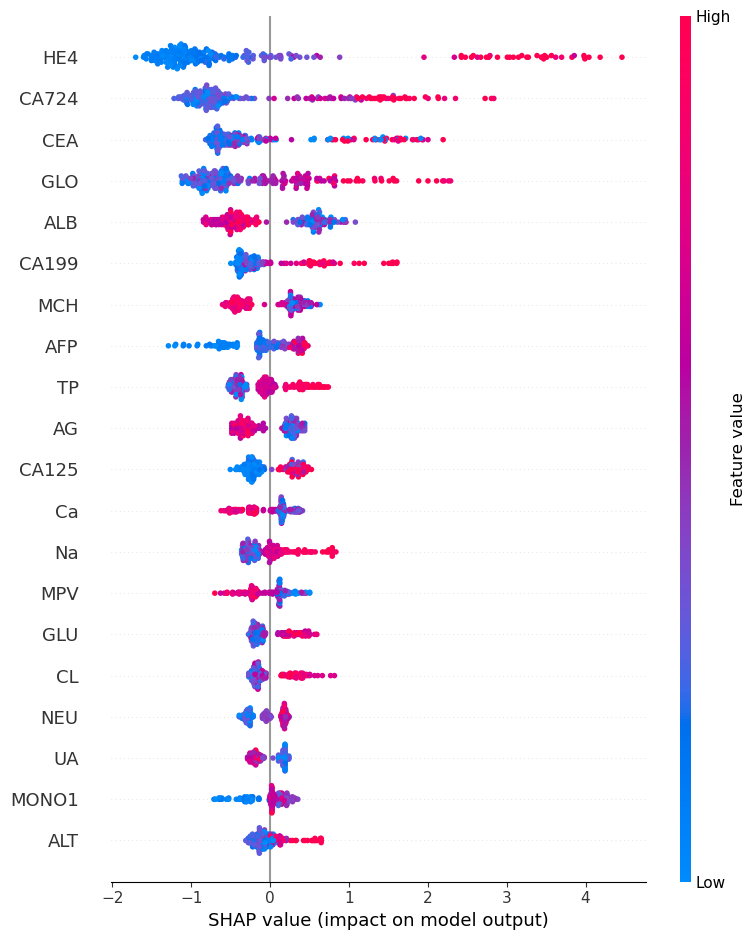

In [ ]:
# Step 1: Fit the model
xg.fit(X_train, y_train)

# Step 2: Initialize SHAP explainer
explainer = shap.TreeExplainer(xg)

# Step 3: Get SHAP values
shap_values = explainer.shap_values(xs)

# Step 4: Plot feature importance based on SHAP values
shap.summary_plot(shap_values, X)


In [ ]:
shap_feature = ['Age', 'HE4', 'CA724', 'CEA', 'GLO', 'ALB', 'CA199', 'MCH', 'AFP', 'TP', 'AG', 'CA125', 'Ca', 'Na', 'MPV', 'GLU', 'CL', 'NEU', 'UA', 'MONO1', 'ALT']

In [ ]:
x_shap= X[shap_feature]
x_shap

,Age,HE4,CA724,CEA,GLO,ALB,CA199,MCH,AFP,TP,...,CA125,Ca,Na,MPV,GLU,CL,NEU,UA,MONO1,ALT
0,47,126.071034,6.420000,1.400000,28.500000,45.400000,36.480000,33.700000,3.580000,73.900000,...,15.360000,2.48,141.300000,11.70,4.670000,107.400000,76.200000,396.4,5.70,11.000000
1,39,47.560000,5.205010,0.770000,32.500000,45.400000,12.180000,28.400000,1.500000,77.900000,...,56.080000,2.57,138.900000,11.40,4.640000,102.600000,69.700000,209.2,5.40,9.000000
2,45,126.071034,12.120032,0.420000,31.500000,35.000000,11.150000,27.700000,2.360000,66.500000,...,219.808907,2.48,141.000000,10.40,4.070000,99.600000,59.500000,206.0,10.00,21.000000
3,44,49.950000,0.740000,1.330000,39.400000,32.900000,22.570000,23.962632,3.790000,72.300000,...,55.970000,2.49,132.493948,9.49,7.170469,99.300000,86.800000,218.2,1.51,32.791227
4,53,14.923059,10.265926,4.028906,30.921788,40.276145,58.787461,29.700000,6.467504,69.669126,...,219.808907,2.24,137.700000,12.10,7.100000,103.200000,60.500000,151.9,4.80,21.993490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,43,40.170000,3.689259,0.590000,25.800000,48.600000,8.370000,30.400000,3.270000,74.400000,...,13.610000,2.58,138.300000,10.90,4.390000,96.500000,70.308467,379.0,3.80,30.000000
226,52,31.450000,4.435316,1.740000,31.800000,48.600000,15.110000,31.100000,2.090000,80.400000,...,50.800000,2.81,140.800000,9.90,5.130000,98.100000,61.703680,241.5,7.30,32.791227
227,37,44.440000,3.688458,1.670000,27.400000,46.100000,0.620000,23.962632,2.000000,73.500000,...,21.930000,2.29,137.100000,11.90,4.590000,103.600000,70.985385,240.5,5.40,9.000000
228,30,30.780000,3.454727,0.930000,28.200000,47.800000,10.710000,28.800000,1.840000,76.000000,...,53.870000,2.82,139.200000,10.50,5.590000,93.338729,72.796501,285.7,4.10,26.000000


In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x_shap)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

In [ ]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=100, ...)

In [ ]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            119.152751
score_time            3.184333
test_accuracy        87.391304
test_recall          72.678571
test_specificity     94.708333
test_gmean           81.854210
test_roc             83.693452
test_precision       89.361111
test_mcc             71.913831
test_f1-score        78.072013
dtype: float64

In [ ]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            129.862792
score_time            6.518831
test_accuracy        87.391304
test_recall          72.678571
test_specificity     94.708333
test_gmean           81.854210
test_roc             83.693452
test_precision       89.361111
test_mcc             71.913831
test_f1-score        78.072013
dtype: float64

In [ ]:
predictions = xg.predict(X_test)
predictions

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1])

In [ ]:
out = predictions==y_test
out.value_counts()

TYPE
True     38
False     8
Name: count, dtype: int64

In [ ]:
x_shap.loc[[0,9]]

,Age,HE4,CA724,CEA,GLO,ALB,CA199,MCH,AFP,TP,...,CA125,Ca,Na,MPV,GLU,CL,NEU,UA,MONO1,ALT
0,47,126.071034,6.420000,1.40,28.5,45.4,36.48,33.7,3.58,73.9,...,15.360000,2.48,141.3,11.7,4.67,107.4,76.2,396.4,5.7,11.0
9,47,126.071034,10.903977,0.63,27.6,39.6,20.93,27.9,4.64,67.2,...,219.808907,2.53,142.7,10.7,4.47,99.7,66.8,249.4,5.9,16.0


In [ ]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: TYPE, dtype: int64

In [ ]:
y_test

217    1
66     0
9      0
193    1
15     0
199    1
25     0
195    1
154    1
126    1
218    1
19     0
96     1
177    1
223    1
137    1
146    0
30     0
225    1
184    1
108    1
162    1
204    1
180    1
125    1
18     0
147    0
101    1
104    1
84     1
197    1
60     0
118    1
45     0
16     0
127    1
159    1
119    1
82     1
144    1
93     1
168    1
143    1
73     1
113    1
112    1
Name: TYPE, dtype: int64

In [ ]:
choosen_instance = x_shap.loc[[9]]
choosen_instance

,Age,HE4,CA724,CEA,GLO,ALB,CA199,MCH,AFP,TP,...,CA125,Ca,Na,MPV,GLU,CL,NEU,UA,MONO1,ALT
9,47,126.071034,10.903977,0.63,27.6,39.6,20.93,27.9,4.64,67.2,...,219.808907,2.53,142.7,10.7,4.47,99.7,66.8,249.4,5.9,16.0


In [ ]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(choosen_instance)
shap_values

array([[ 0.03619321, -2.561054  , -1.1354734 ,  0.03171122, -0.7801801 ,
         0.19317177, -0.5386504 ,  0.3529052 , -0.42796117, -0.4206745 ,
         0.40277797, -0.32024515,  0.2831041 , -0.60674906,  0.42813268,
        -0.16428071, -0.34321353, -0.22732228,  0.30688265, -0.15957397,
        -0.15158835]], dtype=float32)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], choosen_instance)

In [ ]:
shap.initjs()
def p(j):
    explainer = shap.TreeExplainer(xg)
    xgb_binary_shap_values = explainer.shap_values(x_shap)
    return(shap.force_plot(explainer.expected_value, xgb_binary_shap_values[j,:], x_shap.iloc[j,:], link='logit'))

In [ ]:
y_test.iloc[[2]]

9    0
Name: TYPE, dtype: int64

In [ ]:
y_test.loc[225]

1

In [ ]:
p=p(9)

In [ ]:
p

In [ ]:
x_shap.iloc[[225]]

,Age,HE4,CA724,CEA,GLO,ALB,CA199,MCH,AFP,TP,...,CA125,Ca,Na,MPV,GLU,CL,NEU,UA,MONO1,ALT
225,43,40.17,3.689259,0.59,25.8,48.6,8.37,30.4,3.27,74.4,...,13.61,2.58,138.3,10.9,4.39,96.5,70.308467,379.0,3.8,30.0


In [ ]:
p(225)

In [ ]:
x_shap.iloc[[4]]

,Age,HE4,CA724,CEA,GLO,ALB,CA199,MCH,AFP,TP,...,CA125,Ca,Na,MPV,GLU,CL,NEU,UA,MONO1,ALT
4,53,14.923059,10.265926,4.028906,30.921788,40.276145,58.787461,29.7,6.467504,69.669126,...,219.808907,2.24,137.7,12.1,7.1,103.2,60.5,151.9,4.8,21.99349


In [ ]:
p(4)

In [ ]:
# Initialize SHAP explainer for the trained model
explainer = shap.TreeExplainer(model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)


In [ ]:
# Convert test data to original form for easier readability
X_test_original = pd.DataFrame(X_test, columns=x_shap.columns)

# SHAP force plot for premenopausal woman (high risk prediction)
patient_1 = 0  # Index of the first patient in the test set
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[patient_1], X_test_original.iloc[patient_1])

# SHAP force plot for postmenopausal woman (low risk prediction)
patient_2 = 1  # Index of the second patient in the test set
shap.force_plot(explainer.expected_value, shap_values[patient_2], X_test_original.iloc[patient_2])


In [ ]:
# Convert the model's log-odds output to probability using the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# SHAP force plot for premenopausal woman (high risk prediction)
patient_1 = 0  # Index of the first patient in the test set

# Calculate the log-odds to probability
f_x = sigmoid(explainer.expected_value + shap_values[patient_1].sum())

# Display the force plot with sigmoid-transformed values
shap.initjs()


In [ ]:
# Convert test data to original form for easier readability
X_test_original = pd.DataFrame(X_test, columns=x_shap.columns)


In [ ]:

# SHAP force plot for premenopausal woman (high risk prediction)
patient_1 = 0  # Index of the first patient in the test set

# Plot the force plot for the specific patient
shap.force_plot(
    base_value=sigmoid(explainer.expected_value),  # Convert base value to probability
    shap_values=shap_values[patient_1],  # SHAP values remain as is
    features=X_test_original.iloc[patient_1],  # Input feature values for this patient
    link="logit"  # Specify the logit link to interpret results in probability space (0-1)
)


In [ ]:
# SHAP force plot for premenopausal woman (low risk prediction)
patient_2 = 1  # Index of the second patient in the test set
# Plot the force plot for the second patient
shap.force_plot(
    base_value=sigmoid(explainer.expected_value),  # Convert base value to probability
    shap_values=shap_values[patient_2],  # SHAP values remain as is
    features=X_test_original.iloc[patient_2],  # Input feature values for this patient
    link="logit"  # Interpret results in probability space (0-1)
)


In [ ]:
#inserting the model into pickle file
pickle.dump(xg, open('OC_XG.pkl', 'wb'))

In [ ]:
#inserting the model into pickle file
with open('OC_XG.pkl','rb') as file:
    model = pickle.load(file)

In [ ]:
# Function to get user input and convert to the appropriate format
def get_user_data():
    print("Enter the following details:")

    Age = int(input("Age: "))
    HE4 = float(input("HE4(Human Epididymis Protein 4): "))
    CA724 = float(input("CA724 (Carbohydrate Antigen 72-4): "))
    CEA = float(input("CEA (Carcinoembryonic Antigen): "))
    GLO = float(input("GLO (Globulin): "))
    ALB = float(input("ALB (Albumin): "))
    CA199 = float(input("CA199 (Carbohydrate Antigen 19-9): "))
    MCH = float(input("MCH (Mean Corpuscular Hemoglobin): "))
    AFP = float(input("AFP (Alpha-fetoprotein): "))
    TP = float(input("TP (Total Protein): "))
    AG = float(input("AG (Anion Gap): "))
    CA125 = float(input("CA125 (Carbohydrate Antigen 125): "))
    Ca= float(input("Ca (Calcium): "))
    Na = float(input("Na (Natrium): "))
    MPV = float(input("MPV (Mean Platelet Volume): "))
    GLU = float(input("GLU (Glucose): "))
    CL = float(input("CL (Chlorine): "))
    NEU = float(input("NEU (Neutrophil Ratio): "))
    UA = float(input("UA (Uric Acid): "))
    MONO1 = float(input("MONO% (Monocyte Ratio):"))
    ALT = float(input("ALT (Alanine Aminotransferase): "))

    # Arrange the data as per the model's expected format
    person_data_values = [
        Age, HE4, CA724, CEA, GLO, ALB, CA199, MCH, AFP, TP, AG, CA125, Ca, Na, MPV, GLU, CL, NEU, UA, MONO1, ALT
    ]

    return np.array(person_data_values).reshape(1, -1)

# Get user data
person_data_array = get_user_data()

# Predict using the model
prediction = model.predict(person_data_array)[0]

# Interpret the prediction
if prediction == 0:
    print("The model predicts that the women does not have ovarian cancer")
else:
    print("The model predicts that the women has ovarian cancer")

Enter the following details:


Age:  53
HE4(Human Epididymis Protein 4):  14.92306
CA724 (Carbohydrate Antigen 72-4):  10.26593
CEA (Carcinoembryonic Antigen):  4.028906
GLO (Globulin):  30.92179
ALB (Albumin):  40.27615
CA199 (Carbohydrate Antigen 19-9):  58.78746
MCH (Mean Corpuscular Hemoglobin):  29.7
AFP (Alpha-fetoprotein):  6.467
TP (Total Protein):  69.66913
AG (Anion Gap):  21.87
CA125 (Carbohydrate Antigen 125):  219.8089
Ca (Calcium):  2.24
Na (Natrium):  137.7
MPV (Mean Platelet Volume):  12.1
GLU (Glucose):  7.1
CL (Chlorine):  103.2
NEU (Neutrophil Ratio):  60.5
UA (Uric Acid):  151.9
MONO% (Monocyte Ratio): 4.8
ALT (Alanine Aminotransferase):  21.99


The model predicts that the women does not have ovarian cancer


In [ ]:
# Function to get user input and convert to the appropriate format
def get_user_data():
    print("Enter the following details:")

    Age = int(input("Age: "))
    HE4 = float(input("HE4(Human Epididymis Protein 4): "))
    CA724 = float(input("CA724 (Carbohydrate Antigen 72-4): "))
    CEA = float(input("CEA (Carcinoembryonic Antigen): "))
    GLO = float(input("GLO (Globulin): "))
    ALB = float(input("ALB (Albumin): "))
    CA199 = float(input("CA199 (Carbohydrate Antigen 19-9): "))
    MCH = float(input("MCH (Mean Corpuscular Hemoglobin): "))
    AFP = float(input("AFP (Alpha-fetoprotein): "))
    TP = float(input("TP (Total Protein): "))
    AG = float(input("AG (Anion Gap): "))
    CA125 = float(input("CA125 (Carbohydrate Antigen 125): "))
    Ca= float(input("Ca (Calcium): "))
    Na = float(input("Na (Natrium): "))
    MPV = float(input("MPV (Mean Platelet Volume): "))
    GLU = float(input("GLU (Glucose): "))
    CL = float(input("CL (Chlorine): "))
    NEU = float(input("NEU (Neutrophil Ratio): "))
    UA = float(input("UA (Uric Acid): "))
    MONO1 = float(input("MONO% (Monocyte Ratio):"))
    ALT = float(input("ALT (Alanine Aminotransferase): "))

    # Arrange the data as per the model's expected format
    person_data_values = [
        Age, HE4, CA724, CEA, GLO, ALB, CA199, MCH, AFP, TP, AG, CA125, Ca, Na, MPV, GLU, CL, NEU, UA, MONO1, ALT
    ]

    return np.array(person_data_values).reshape(1, -1)

# Get user data
person_data_array = get_user_data()

# Predict using the model
prediction = model.predict(person_data_array)[0]

# Interpret the prediction
if prediction == 0:
    print("The model predicts that the women does not have ovarian cancer")
else:
    print("The model predicts that the women has ovarian cancer")

In [ ]:
x_shap.iloc[[4]]

,Age,HE4,CA724,CEA,GLO,ALB,CA199,MCH,AFP,TP,...,CA125,Ca,Na,MPV,GLU,CL,NEU,UA,MONO1,ALT
4,53,14.923059,10.265926,4.028906,30.921788,40.276145,58.787461,29.7,6.467504,69.669126,...,219.808907,2.24,137.7,12.1,7.1,103.2,60.5,151.9,4.8,21.99349


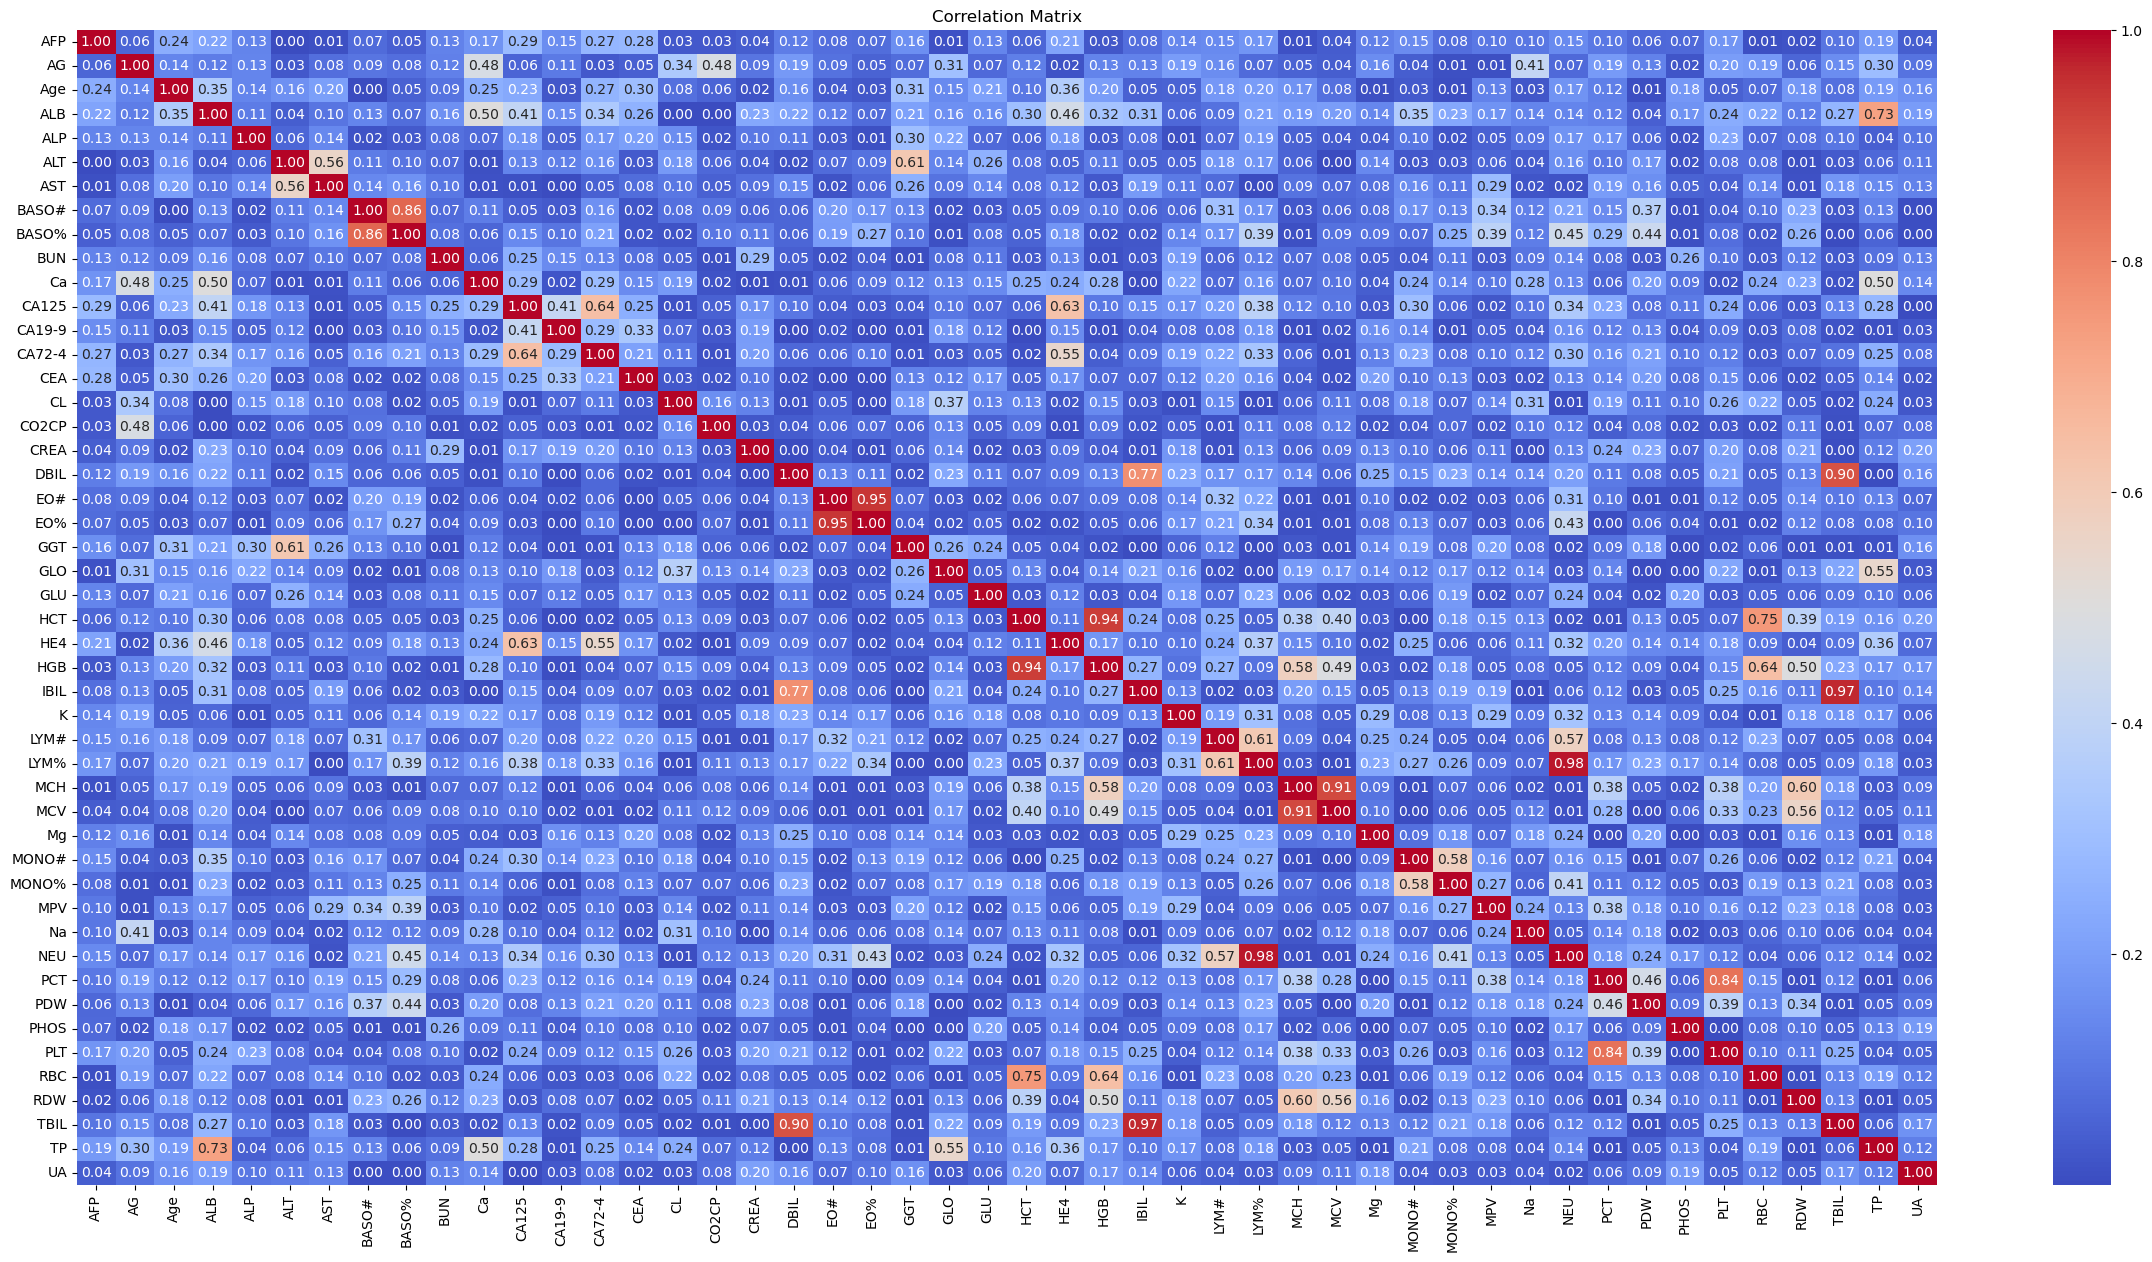

Features to drop due to high correlation: ['EO%', 'HGB', 'MCV', 'NEU', 'TBIL']
Remaining features after correlation-based selection: Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'GGT', 'GLO', 'GLU', 'HCT', 'HE4', 'IBIL', 'K', 'LYM#', 'LYM%',
       'MCH', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'PCT', 'PDW', 'PHOS', 'PLT',
       'RBC', 'RDW', 'TP', 'UA'],
      dtype='object')


In [ ]:
# Step 1: Calculate the correlation matrix
corr_matrix = X.corr().abs()  # Taking absolute values of correlation coefficients

# Step 2: Plot the correlation matrix (optional, for visualization)
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Step 3: Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Step 4: Find features with correlation greater than a threshold (e.g., 0.9)
threshold = 0.90
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Features to drop due to high correlation:", to_drop)

# Step 5: Drop the selected features from the dataset
X_reduced = X.drop(to_drop, axis=1)

print("Remaining features after correlation-based selection:", X_reduced.columns)

In [ ]:
corr_feature = ['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'GGT', 'GLO', 'GLU', 'HCT', 'HE4', 'IBIL', 'K', 'LYM#', 'LYM%',
       'MCH', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'PCT', 'PDW', 'PHOS', 'PLT',
       'RBC', 'RDW', 'TP', 'UA']

In [ ]:
x_corr= X[corr_feature]
x_corr

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,MPV,Na,PCT,PDW,PHOS,PLT,RBC,RDW,TP,UA
0,3.580000,19.36,47,45.400000,56.000000,11.000000,24.000000,0.01,0.30,5.35,...,11.70,141.300000,0.090,13.4,1.46,74.0,3.169092,13.700000,73.900000,396.4
1,1.500000,18.40,39,45.400000,77.000000,9.000000,18.000000,0.03,0.60,3.80,...,11.40,138.900000,0.130,15.2,0.97,112.0,4.620000,12.000000,77.900000,209.2
2,2.360000,19.97,45,35.000000,47.000000,21.000000,27.000000,0.01,0.10,4.89,...,10.40,141.000000,0.280,11.9,0.94,272.0,4.400000,13.400000,66.500000,206.0
3,3.790000,17.39,44,32.900000,118.000000,32.791227,32.000000,0.02,0.42,4.47,...,9.49,132.493948,0.265,19.1,0.68,279.0,4.440000,16.658245,72.300000,218.2
4,6.467504,21.87,53,40.276145,74.198102,21.993490,18.769079,0.02,0.50,2.60,...,12.10,137.700000,0.180,16.8,1.50,148.0,4.640000,12.100000,69.669126,151.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,21.32,43,48.600000,60.000000,30.000000,16.000000,0.03,0.50,4.86,...,10.90,138.300000,0.230,13.2,1.07,210.0,4.830000,12.100000,74.400000,379.0
226,2.090000,20.91,52,48.600000,65.000000,32.791227,30.000000,0.00,0.00,4.29,...,9.90,140.800000,0.220,10.8,0.99,219.0,4.560000,11.900000,80.400000,241.5
227,2.000000,12.14,37,46.100000,49.000000,9.000000,20.000000,0.00,0.00,3.12,...,11.90,137.100000,0.310,17.3,0.95,262.0,4.240000,16.658245,73.500000,240.5
228,1.840000,27.22,30,47.800000,64.000000,26.000000,22.000000,0.03,0.30,3.61,...,10.50,139.200000,0.420,13.4,1.31,398.0,5.350000,12.500000,76.000000,285.7


In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x_corr)

In [ ]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            15.336242
score_time           5.004029
test_accuracy       86.956522
test_recall         72.321429
test_specificity    94.208333
test_gmean          81.788045
test_roc            83.264881
test_precision      88.392857
test_mcc            70.973900
test_f1-score       77.706183
dtype: float64

In [ ]:
def calculate_roma(he4, ca125, menopausal_status):
    # Natural logarithm of HE4 and CA125
    ln_he4 = np.log(he4)
    ln_ca125 = np.log(ca125)

    # Calculate Predictive Index (PI) based on menopausal status
    if menopausal_status == 'pre':
        # Pre-menopausal PI formula
        PI = -12.0 + 2.38 * ln_he4 + 0.0626 * ln_ca125
        cut_off = 13.1  # Cut-off percentage for high risk in pre-menopausal
    elif menopausal_status == 'post':
        # Post-menopausal PI formula
        PI = -8.09 + 1.04 * ln_he4 + 0.732 * ln_ca125
        cut_off = 27.7  # Cut-off percentage for high risk in post-menopausal
    else:
        raise ValueError("Invalid menopausal status. Choose either 'pre' or 'post'.")

    # Calculate ROMA score
    roma_score = (np.exp(PI) / (1 + np.exp(PI))) * 100

    # Determine if the patient is at high risk
    if roma_score >= cut_off:
        risk_status = "High Risk"
    else:
        risk_status = "Low Risk"

    return roma_score, risk_status


In [ ]:
# Example usage:
he4_value = 40.17  # Example HE4 level
ca125_value = 13.61 # Example CA125 level
menopausal_status = 'pre'  # 'pre' for pre-menopausal, 'post' for post-menopausal

roma_score, risk = calculate_roma(he4_value, ca125_value, menopausal_status)

print(f"ROMA Score: {roma_score:.2f}%")
print(f"Risk Status: {risk}")

ROMA Score: 4.53%
Risk Status: Low Risk


In [ ]:
# Initialize SHAP explainer for the trained model
explainer = shap.TreeExplainer(model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/data_pre_meno.csv")

In [ ]:
data.head(10)

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.580000,19.36,47,45.400000,56.000000,11.000000,24.000000,0.010000,0.30,5.35,...,0.090,13.4,1.46,74.0,3.169092,13.700000,5.500000,73.900000,396.4,1
1,1.500000,18.40,39,45.400000,77.000000,9.000000,18.000000,0.030000,0.60,3.80,...,0.130,15.2,0.97,112.0,4.620000,12.000000,14.800000,77.900000,209.2,1
2,2.360000,19.97,45,35.000000,47.000000,21.000000,27.000000,0.010000,0.10,4.89,...,0.280,11.9,0.94,272.0,4.400000,13.400000,5.300000,66.500000,206.0,1
3,3.790000,17.39,44,32.900000,118.000000,32.791227,32.000000,0.020000,0.42,4.47,...,0.265,19.1,0.68,279.0,4.440000,16.658245,8.100000,72.300000,218.2,1
4,6.467504,21.87,53,40.276145,74.198102,21.993490,18.769079,0.020000,0.50,2.60,...,0.180,16.8,1.50,148.0,4.640000,12.100000,9.089676,69.669126,151.9,1
5,1.010000,23.63,38,36.300000,64.000000,32.791227,34.791227,0.000000,0.40,2.50,...,0.250,17.4,1.01,277.0,4.960000,16.658245,5.500000,79.600000,140.1,1
6,4.700000,16.86,30,40.800000,77.000000,16.000000,12.000000,0.074478,1.23,5.78,...,0.228,16.9,1.46,348.0,5.050000,14.000000,8.400000,71.900000,210.3,1
7,1.930000,23.04,34,51.500000,68.000000,7.000000,21.000000,0.010000,0.20,3.82,...,0.260,13.4,1.16,224.0,4.210000,15.500000,5.600000,80.700000,162.1,1
8,6.467504,15.57,42,35.400000,83.000000,10.000000,16.000000,0.040000,0.60,2.75,...,0.330,11.8,0.82,321.0,5.050000,12.000000,5.700000,67.500000,197.7,1
9,4.640000,16.94,47,39.600000,128.821486,16.000000,16.000000,0.030000,0.30,3.88,...,0.280,12.7,1.06,265.0,4.910000,11.900000,6.400000,67.200000,249.4,1


In [ ]:
data.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na',
       'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA',
       'TYPE'],
      dtype='object')

<ipython-input-22-ec37ece0bb6b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')


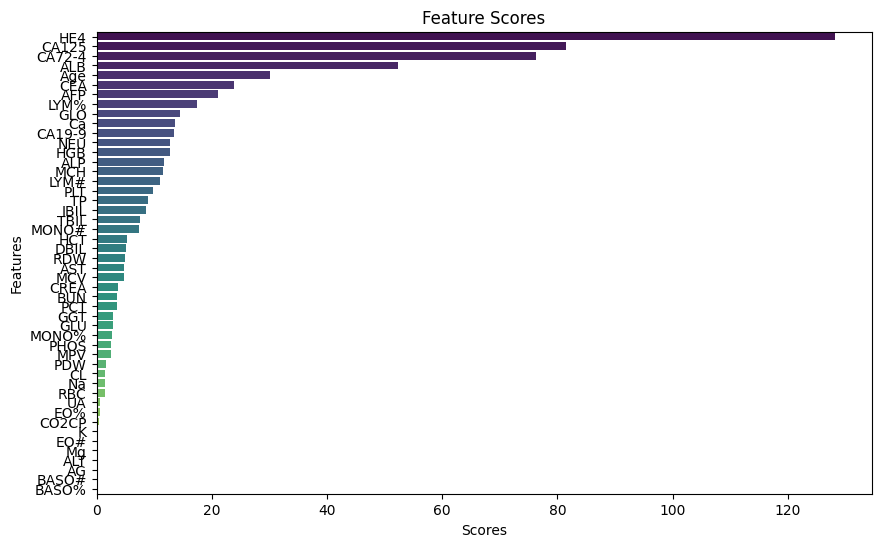

Reduced features: Index(['AFP', 'Age', 'ALB', 'ALP', 'AST', 'BUN', 'Ca', 'CA125', 'CA19-9',
       'CA72-4', 'CEA', 'CL', 'CREA', 'DBIL', 'GGT', 'GLO', 'GLU', 'HCT',
       'HE4', 'HGB', 'IBIL', 'LYM#', 'LYM%', 'MCH', 'MCV', 'MONO#', 'MONO%',
       'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL',
       'TP'],
      dtype='object')


,AFP,Age,ALB,ALP,AST,BUN,Ca,CA125,CA19-9,CA72-4,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,TYPE
0,3.580000,47,45.400000,56.000000,24.000000,5.35,2.48,15.360000,36.480000,6.420000,...,76.2,0.090,13.4,1.46,74.0,3.169092,13.700000,5.500000,73.900000,1
1,1.500000,39,45.400000,77.000000,18.000000,3.80,2.57,56.080000,12.180000,5.205010,...,69.7,0.130,15.2,0.97,112.0,4.620000,12.000000,14.800000,77.900000,1
2,2.360000,45,35.000000,47.000000,27.000000,4.89,2.48,219.808907,11.150000,12.120032,...,59.5,0.280,11.9,0.94,272.0,4.400000,13.400000,5.300000,66.500000,1
3,3.790000,44,32.900000,118.000000,32.000000,4.47,2.49,55.970000,22.570000,0.740000,...,86.8,0.265,19.1,0.68,279.0,4.440000,16.658245,8.100000,72.300000,1
4,6.467504,53,40.276145,74.198102,18.769079,2.60,2.24,219.808907,58.787461,10.265926,...,60.5,0.180,16.8,1.50,148.0,4.640000,12.100000,9.089676,69.669126,1


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/data_pre_meno.csv")

# Drop columns with any NaN values
data = data.dropna(axis=1)

# Separate features and target variable
X = data.drop('TYPE', axis=1)
y = data['TYPE']

# One-hot encode categorical variables (like 'sex' and 'referral_source')
X = pd.get_dummies(X, drop_first=True)

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k='all')  # k='all' to get scores for all features
X_selected = selector.fit_transform(X, y)

# Get selected feature names and their scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

# Identify and remove the least important features
# For this example, let's remove the bottom 5 features
least_important_features = feature_scores_data_set.tail(10)['Features'].tolist()
X_reduced = X.drop(columns=least_important_features)

# Display the columns of X_reduced
reduced_features = X_reduced.columns
print("Reduced features:", reduced_features)

# Combine reduced features with the target variable
data_reduced = pd.concat([X_reduced, y], axis=1)

# Display the reduced dataset
data_reduced.head()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_row',None)

In [ ]:
# Load the dataset and select GA features + target
data = pd.read_csv("/content/data_pre_meno.csv")
data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.580000,19.36,47,45.400000,56.000000,11.00000,24.000000,0.01,0.30,5.35,2.48,15.3600,36.48000,6.420000,1.400000,107.40000,19.9,95.768989,2.000000,0.040000,1.00,16.000000,28.500000,4.670000,0.2857,126.071034,91.417547,3.500000,5.36,0.65,16.8,33.700000,101.453859,0,0.780000,0.220000,5.70,11.70,141.300000,76.200000,0.090,13.4,1.46,74.0,3.169092,13.700000,5.500000,73.900000,396.4,0
1,1.500000,18.40,39,45.400000,77.000000,9.00000,18.000000,0.03,0.60,3.80,2.57,56.0800,12.18000,5.205010,0.770000,102.60000,22.2,48.000000,4.700000,0.030000,0.60,10.000000,32.500000,4.640000,0.3910,47.560000,131.000000,10.100000,4.30,1.10,23.7,28.400000,84.600000,0,1.000000,0.250000,5.40,11.40,138.900000,69.700000,0.130,15.2,0.97,112.0,4.620000,12.000000,14.800000,77.900000,209.2,0
2,2.360000,19.97,45,35.000000,47.000000,21.00000,27.000000,0.01,0.10,4.89,2.48,219.8089,11.15000,12.120030,0.420000,99.60000,26.2,70.300000,2.200000,0.110000,1.60,24.000000,31.500000,4.070000,0.3830,126.071034,122.000000,3.100000,4.77,1.98,28.8,27.700000,87.000000,0,1.080000,0.675825,10.00,10.40,141.000000,59.500000,0.280,11.9,0.94,272.0,4.400000,13.400000,5.300000,66.500000,206.0,0
3,3.790000,17.39,44,32.900000,118.000000,32.79123,32.000000,0.02,0.42,4.47,2.49,55.9700,22.57000,0.740000,1.330000,99.30000,20.1,80.700000,5.900000,0.010000,0.19,38.239033,39.400000,7.170469,0.3060,49.950000,96.500000,2.200000,4.89,0.52,11.1,23.962632,76.546141,0,0.930000,0.070000,1.51,9.49,132.493948,86.800000,0.265,19.1,0.68,279.0,4.440000,16.658245,8.100000,72.300000,218.2,0
4,6.467504,21.87,53,40.276145,74.198102,21.99349,18.769079,0.02,0.50,2.60,2.24,219.8089,58.78746,10.265926,4.028906,103.20000,21.3,44.000000,3.128614,0.060000,1.50,19.156031,30.921788,7.100000,0.4210,14.923059,138.000000,5.961062,4.20,1.28,32.7,29.700000,90.700000,0,0.658654,0.190000,4.80,12.10,137.700000,60.500000,0.180,16.8,1.50,148.0,4.640000,12.100000,9.089676,69.669126,151.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270000,21.32,43,48.600000,60.000000,30.00000,16.000000,0.03,0.50,4.86,2.58,13.6100,8.37000,3.689259,0.590000,96.50000,24.6,67.000000,2.900000,0.060000,1.10,29.000000,25.800000,4.390000,0.4400,40.170000,147.000000,4.800000,4.12,1.36,24.3,30.400000,91.100000,0,0.940000,0.210000,3.80,10.90,138.300000,70.308467,0.230,13.2,1.07,210.0,4.830000,12.100000,7.700000,74.400000,379.0,1
226,2.090000,20.91,52,48.600000,65.000000,32.79123,30.000000,0.00,0.00,4.29,2.81,50.8000,15.11000,4.435316,1.740000,98.10000,25.9,54.000000,3.800000,0.010000,0.30,36.000000,31.800000,5.130000,0.4150,31.450000,142.000000,6.900000,4.11,1.18,30.7,31.100000,91.000000,0,0.940000,0.280000,7.30,9.90,140.800000,61.703680,0.220,10.8,0.99,219.0,4.560000,11.900000,10.700000,80.400000,241.5,1
227,2.000000,12.14,37,46.100000,49.000000,9.00000,20.000000,0.00,0.00,3.12,2.29,21.9300,0.62000,3.688458,1.670000,103.60000,25.0,67.000000,5.900000,0.020000,0.30,9.000000,27.400000,4.590000,0.2857,44.440000,91.417547,11.300000,3.64,1.39,23.3,23.962632,76.546140,0,0.770000,0.320000,5.40,11.90,137.100000,70.985385,0.310,17.3,0.95,262.0,4.240000,16.658245,17.200000,73.500000,240.5,1
228,1.840000,27.22,30,47.800000,64.000000,26.00000,22.000000,0.03,0.30,3.61,2.82,53.8700,10.71000,3.454727,0.930000,93.33873,23.1,59.000000,3.500000,0.183434,2.20,25.000000,28.200000,5.590000,0.4580,30.780000,154.000000,7.800000,4.22,2.15,20.6,28.800000,85.600000,0,1.020000,0.430000,4.10,10.50,139.200000,72.796501,0.420,13.4,1.31,398.0,5.350000,12.500000,11.300000,76.000000,285.7,1


In [ ]:
data.columns = data.columns.str.replace('-', '')  # Remove hyphen, e.g. CA72-4 becomes CA724
data.columns = data.columns.str.replace('%','1')
data.columns = data.columns.str.replace('#','')

In [ ]:
data = data.drop('Menopause', axis=1)

In [ ]:
ga_features = ['CA125', 'HE4', 'CEA', 'ALB', 'TP', 'LYM']  #from GA
X = data[ga_features]
y = data['TYPE']

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:35:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:35:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8710
ROC-AUC Score: 0.9147

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        31

    accuracy                           0.87        62
   macro avg       0.89      0.87      0.87        62
weighted avg       0.89      0.87      0.87        62



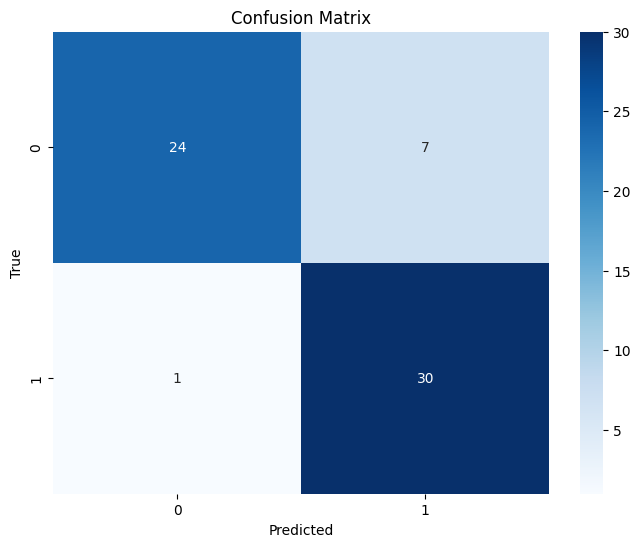

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split into stratified training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'min_child_weight': [3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [len(y_train[y_train == 0]) / len(y_train[y_train == 1])],
}

# Initialize XGBClassifier without early stopping (needed for GridSearch)
xg = xgb.XGBClassifier(use_label_encoder=False, random_state=100)

# Use GridSearchCV to find the best parameters
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_

# Train the model with early stopping using native xgboost.train
final_params = best_params.copy()
final_params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
})

# Train the model with early stopping
bst_model = xgb.train(
    final_params, dtrain,
    num_boost_round=500,
    evals=[(dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# Predict using the best model
y_prob = bst_model.predict(dtest)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_prob]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:47:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8710
ROC-AUC Score: 0.9147

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        31

    accuracy                           0.87        62
   macro avg       0.89      0.87      0.87        62
weighted avg       0.89      0.87      0.87        62



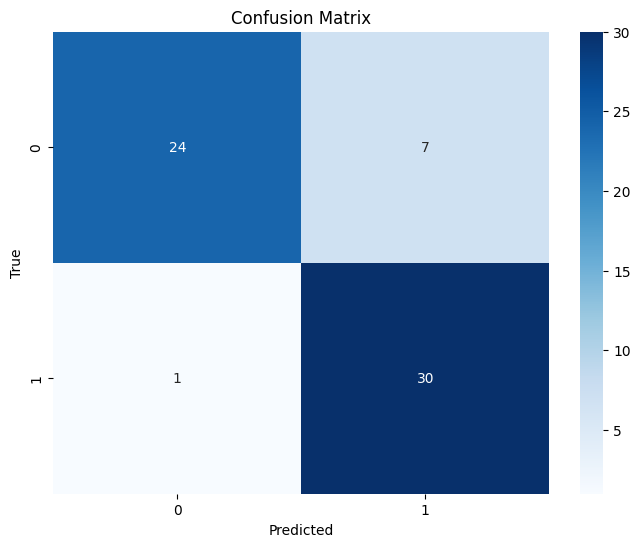

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split into stratified training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [4, 6],
    'min_child_weight': [3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [len(y_train[y_train == 0]) / len(y_train[y_train == 1])],
}


# Initialize XGBClassifier without early stopping (needed for GridSearch)
xg = XGBClassifier( random_state=100)

# Use GridSearchCV to find the best parameters
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_

# Train the model with early stopping using native xgboost.train
final_params = best_params.copy()
final_params.update({
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
})

# Train the model with early stopping
bst_model = xgb.train(
    final_params, dtrain,
    num_boost_round=500,
    evals=[(dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# Predict using the best model
y_prob = bst_model.predict(dtest)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_prob]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Save the model to a pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved to 'best_model.pkl")

Model saved to 'best_model.pkl


In [ ]:
# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model from the pickle file
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the fitted scaler used during training
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Function to get user input and make predictions
def get_user_input_and_predict():
    # Get user input for each feature
    ca125 = float(input("Enter CA125 value: "))
    he4 = float(input("Enter HE4 value: "))
    cea = float(input("Enter CEA value: "))
    alb = float(input("Enter ALB value: "))
    tp = float(input("Enter TP value: "))
    lym = float(input("Enter LYM# value: "))

    # Create a DataFrame for the input
    input_data = pd.DataFrame([[ca125, he4, cea, alb, tp, lym]], columns=['CA125', 'HE4', 'CEA', 'ALB', 'TP', 'LYM'])

    # Scale the input data using the loaded scaler
    input_data_scaled = scaler.transform(input_data)  # Use transform instead of fit_transform

    # Make predictions
    prediction = model.predict(input_data_scaled)
    prediction_proba = model.predict_proba(input_data_scaled)

    # Print the prediction result
    print(f"Predicted TYPE = {prediction[0]}, Probability = {prediction_proba[0][1]:.4f}")

# Call the function to get user input and predict
get_user_input_and_predict()


Enter CA125 value: 15.3
Enter HE4 value: 8.2
Enter CEA value: 1.8
Enter ALB value: 45.4
Enter TP value: 70
Enter LYM# value: 2.1
Predicted TYPE = 1, Probability = 0.9471


In [ ]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Load the trained model from the pickle file
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the scaler used during training
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Function to get user input and make predictions
def get_user_input_and_predict():
    # Get user input for each feature
    ca125 = float(input("Enter CA125 value: "))
    he4 = float(input("Enter HE4 value: "))
    cea = float(input("Enter CEA value: "))
    alb = float(input("Enter ALB value: "))
    tp = float(input("Enter TP value: "))
    lym = float(input("Enter LYM# value: "))

    # Create a DataFrame for the input
    input_data = pd.DataFrame([[ca125, he4, cea, alb, tp, lym]], columns=['CA125', 'HE4', 'CEA', 'ALB', 'TP', 'LYM'])

    # Scale the input data using the fitted scaler
    input_data_scaled = scaler.transform(input_data)

    # Make predictions
    prediction_proba = model.predict_proba(input_data_scaled)[:, 1]  # Probability of class 1
    threshold = 0.3  # Example threshold for adjusting predictions
    prediction = (prediction_proba >= threshold).astype(int)

    # Print the prediction result
    print(f"Predicted TYPE = {prediction[0]}, Probability = {prediction_proba[0]:.4f}")

# Call the function to get user input and predict
get_user_input_and_predict()


Enter CA125 value: 220.5
Enter HE4 value: 12.7
Enter CEA value: 11.2
Enter ALB value: 38.5
Enter TP value: 70.1
Enter LYM# value: 3.2
Predicted TYPE = 0, Probability = 0.2153


In [ ]:
1'CA125': 219.8, 'HE4': 9.5, 'CEA': 12.3, 'ALB': 40.2, 'TP': 72, 'LYM#': 2.5  Correct

{'CA125': 219.8, 'HE4': 9.5, 'CEA': 12.3, 'ALB': 40.2, 'TP': 72, 'LYM#': 2.5} Correct
{'CA125': 220.5, 'HE4': 12.7, 'CEA': 11.2, 'ALB': 38.5, 'TP': 70.1, 'LYM#': 3.2} correct
{'CA125': 18.5, 'HE4': 7.8, 'CEA': 1.7, 'ALB': 43.5, 'TP': 73.8, 'LYM#': 1.8}
{'CA125': 15.3, 'HE4': 8.2, 'CEA': 1.8, 'ALB': 45.4, 'TP': 70, 'LYM#': 2.1}

Example Input Data
Case 1 (Predicted TYPE = 0):

CA125: 15.0
HE4: 30.0
CEA: 2.0
ALB: 4.0
TP: 6.5
LYM#: 1.0
Case 2 (Predicted TYPE = 1):

CA125: 120.0
HE4: 250.0
CEA: 10.0
ALB: 3.5
TP: 5.0
LYM#: 0.5
Case 3 (Predicted TYPE = 0):

CA125: 8.0
HE4: 25.0
CEA: 1.5
ALB: 4.5
TP: 6.0
LYM#: 1.5
Case 4 (Predicted TYPE = 1):

CA125: 200.0
HE4: 300.0
CEA: 15.0
ALB: 2.5
TP: 5.5
LYM#: 0.3

In [ ]:
import numpy as np

# Generate synthetic user data for testing
test_users = [
    {'CA125': 35, 'HE4': 90, 'CEA': 5.5, 'ALB': 42, 'TP': 75, 'LYM#': 2.0},
    {'CA125': 10, 'HE4': 40, 'CEA': 1.5, 'ALB': 44, 'TP': 72, 'LYM#': 2.5},
    {'CA125': 60, 'HE4': 150, 'CEA': 9.0, 'ALB': 39, 'TP': 70, 'LYM#': 1.5},
    {'CA125': 25, 'HE4': 70, 'CEA': 3.0, 'ALB': 43, 'TP': 73, 'LYM#': 2.2},
    {'CA125': 50, 'HE4': 130, 'CEA': 8.0, 'ALB': 40, 'TP': 71, 'LYM#': 1.8},
]

# Convert the synthetic data into a DataFrame
user_df = pd.DataFrame(test_users)

# Standardize the user data using the same scaler
user_data_scaled = scaler.transform(user_df)

# Predict using the trained model
user_predictions = bst_model.predict(xgb.DMatrix(user_data_scaled))
user_probabilities = bst_model.predict(xgb.DMatrix(user_data_scaled), output_margin=False)

# Example of changing the threshold
new_threshold = 0.4
user_predictions_adjusted = (user_probabilities >= new_threshold).astype(int)

# Print adjusted predictions
for i, pred in enumerate(user_predictions_adjusted):
    print(f"User {i+1}: Adjusted Predicted TYPE = {int(pred)}")



User 1: Adjusted Predicted TYPE = 0
User 2: Adjusted Predicted TYPE = 1
User 3: Adjusted Predicted TYPE = 0
User 4: Adjusted Predicted TYPE = 1
User 5: Adjusted Predicted TYPE = 0


In [ ]:
# Training set evaluation
y_train_pred = best_model.predict(X_train_scaled)
y_train_prob = best_model.predict_proba(X_train_scaled)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_prob)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training ROC-AUC Score: {train_roc_auc:.4f}')


Training Accuracy: 0.9476
Training ROC-AUC Score: 0.9874


In [ ]:
# Example: Check distribution of target variable
print(data['TYPE'].value_counts())


TYPE
1    155
0     75
Name: count, dtype: int64


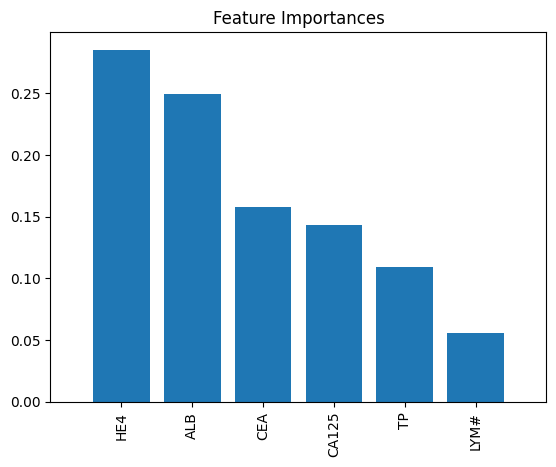

In [ ]:
import numpy as np

# Assuming best_model is your trained model
import matplotlib.pyplot as plt

# Get feature importances
importances = best_model.feature_importances_
features = ['CA125', 'HE4', 'CEA', 'ALB', 'TP', 'LYM#']
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [124]:
# Load the dataset and select GA features + target
data = pd.read_csv("/content/data_post_meno.csv")
data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,6.920000,23.980000,61,39.9,95.0000,9.0,13.0,0.02,0.30,3.21,2.620000,219.8089,19.98000,12.120030,2.460000,100.1,22.3,45.0,2.6,0.040000,0.500000,13.000000,32.1,7.170469,0.417,126.071034,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1,0.82,0.41,5.50,10.00,142.0,76.500000,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2,0
1,2.750000,16.600000,45,39.2,26.0000,16.0,17.0,0.05,0.74,5.27,2.350000,219.8089,18.41000,12.120030,0.820000,103.2,24.0,65.7,2.9,0.000000,0.070000,17.000000,26.9,4.760000,0.372,126.071034,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1,1.11,0.42,6.55,7.38,139.1,65.500000,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6,0
2,3.030000,24.050000,76,50.4,76.0000,16.0,23.0,0.04,0.50,5.05,2.680000,39.8300,1.97000,3.710966,3.450000,103.5,21.9,68.0,2.3,0.183434,3.157338,17.000000,26.6,5.670000,0.437,126.071034,140.0,5.1,4.75,1.79,20.5,30.4,94.8,1,0.86,0.37,4.20,12.00,144.7,70.900000,0.24,15.1,1.17,205.0,4.61,12.8,7.4,77.0,334.2,0
3,4.000000,23.290000,63,44.6,71.0000,14.0,23.0,0.01,0.20,4.90,2.350000,16.6500,58.78746,3.957770,2.190000,104.0,23.0,74.0,1.9,0.010000,0.200000,18.000000,25.2,5.500000,0.377,96.470000,119.0,4.2,4.33,0.89,18.2,30.1,95.4,1,0.88,0.36,7.40,8.90,141.6,74.000000,0.19,8.8,1.38,215.0,3.95,14.9,6.1,69.8,325.2,0
4,6.467504,16.060000,65,45.6,128.8215,32.0,16.0,0.04,0.70,2.25,2.630000,219.8089,58.78746,12.120030,3.427377,106.6,28.5,49.0,1.4,0.020000,0.300000,38.239033,34.0,4.940000,0.396,126.071034,123.0,3.0,4.26,1.30,22.2,28.4,91.5,1,1.01,0.35,6.00,9.70,146.9,70.800000,0.30,10.4,1.04,306.0,4.33,12.3,4.4,79.6,234.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.620000,65,41.3,73.0000,16.0,23.0,0.03,0.70,5.23,2.710000,8.5400,4.31000,3.728220,2.770000,103.0,22.2,72.0,3.2,0.120000,2.600000,24.000000,33.1,6.140000,0.400,61.080000,135.0,5.9,4.32,1.02,22.5,29.7,87.9,1,0.91,0.20,4.40,9.80,140.5,69.815125,0.20,10.2,1.10,200.0,4.55,13.5,9.1,74.4,294.0,1
115,5.840000,22.800000,50,45.4,55.0000,18.0,19.0,0.06,0.60,5.49,2.630000,5.1200,5.32000,3.627316,1.900000,101.4,23.1,56.0,3.5,0.130000,1.300000,8.000000,25.5,5.540000,0.374,41.340000,123.0,7.2,4.00,1.30,12.7,31.6,96.1,1,0.95,0.38,3.70,11.20,143.3,81.714560,0.24,13.1,1.11,214.0,3.89,11.8,10.7,70.9,266.7,1
116,4.890000,9.500000,67,44.0,76.0000,13.0,24.0,0.04,0.60,5.86,1.891785,15.0600,32.68000,4.338559,4.040000,101.5,24.5,51.0,2.7,0.080000,1.300000,12.000000,30.9,6.110000,0.421,55.230000,132.0,6.5,4.30,1.69,27.1,28.8,91.7,1,1.00,0.32,5.10,12.60,143.0,65.911381,0.18,17.6,1.24,141.0,4.59,13.6,9.2,74.9,240.3,1
117,6.467504,8.789439,58,45.7,83.0000,12.0,14.0,0.01,0.20,5.31,1.891785,17.7200,28.08000,3.999032,3.710000,102.5,19.9,73.0,3.4,0.100000,1.700000,15.000000,34.2,5.390000,0.432,54.940000,154.0,7.4,4.15,1.48,25.9,30.2,89.0,1,0.92,0.25,4.40,11.80,144.2,67.789084,0.22,16.9,0.93,187.0,5.10,12.4,10.8,79.9,373.4,1


In [125]:
data = data.drop('Menopause', axis=1)

In [126]:
data.columns = data.columns.str.replace('-', '')  # Remove hyphen, e.g. CA72-4 becomes CA724
data.columns = data.columns.str.replace('%','1')
data.columns = data.columns.str.replace('#','')

In [129]:
ga_features = ['CA125','CA199', 'RBC', 'Na', 'MONO1', 'K', 'HCT']
X = data[ga_features]
y = data['TYPE']

In [135]:
X

,CA125,CA199,RBC,Na,MONO1,K,HCT
0,219.8089,19.98000,4.89,142.0,5.50,4.38,0.417
1,219.8089,18.41000,4.01,139.1,6.55,4.70,0.372
2,39.8300,1.97000,4.61,144.7,4.20,4.75,0.437
3,16.6500,58.78746,3.95,141.6,7.40,4.33,0.377
4,219.8089,58.78746,4.33,146.9,6.00,4.26,0.396
...,...,...,...,...,...,...,...
114,8.5400,4.31000,4.55,140.5,4.40,4.32,0.400
115,5.1200,5.32000,3.89,143.3,3.70,4.00,0.374
116,15.0600,32.68000,4.59,143.0,5.10,4.30,0.421
117,17.7200,28.08000,5.10,144.2,4.40,4.15,0.432


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Accuracy: 0.8718
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.83      0.95      0.88        20

    accuracy                           0.87        39
   macro avg       0.88      0.87      0.87        39
weighted avg       0.88      0.87      0.87        39



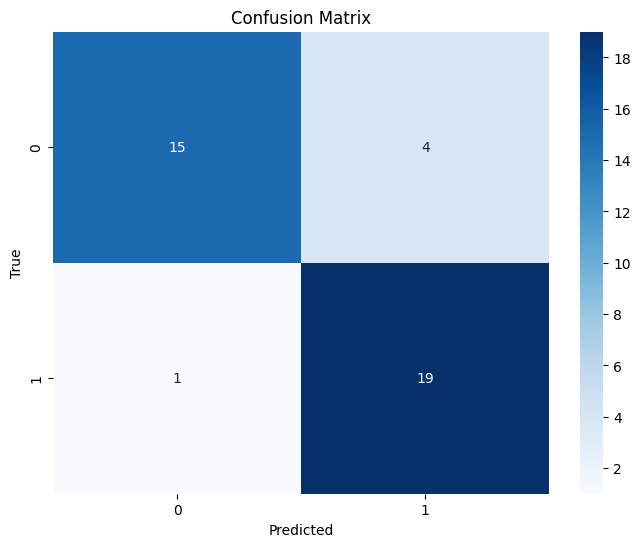

User 1: Predicted TYPE = 0, Class Probabilities = [0: 0.9776, 1: 0.0224]
User 2: Predicted TYPE = 0, Class Probabilities = [0: 0.9040, 1: 0.0960]
User 3: Predicted TYPE = 0, Class Probabilities = [0: 0.9171, 1: 0.0829]
User 4: Predicted TYPE = 0, Class Probabilities = [0: 0.9462, 1: 0.0538]
User 5: Predicted TYPE = 0, Class Probabilities = [0: 0.8964, 1: 0.1036]
User 6: Predicted TYPE = 0, Class Probabilities = [0: 0.9435, 1: 0.0565]


In [107]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original DataFrame and ga_features has been defined.
# ga_features = ['CA199', 'RBC', 'HCT', 'K', 'MONO', 'Na']
X = data[ga_features]
y = data['TYPE']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=50)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier with class weight adjustment
xg = XGBClassifier(
    eval_metric='logloss',
    random_state=100,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Adjust for class imbalance
)

# Expanded hyperparameter grid for better tuning
param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 7, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ---- Predict User Input ----
# Example user inputs (3 positive cases, 3 negative cases)
user_data = pd.DataFrame([
    [40, 5.1, 42.5, 3.5, 9.1, 139],  # Positive case
    [12, 4.5, 41.2, 3.4, 8.9, 138],  # Positive case
    [50, 5.6, 44.0, 3.8, 9.2, 142],  # Positive case
    [5, 4.0, 37.0, 2.9, 6.5, 136],   # Negative case
    [10, 3.9, 38.2, 2.8, 7.0, 137],  # Negative case
    [6, 3.8, 39.1, 3.0, 6.8, 135]    # Negative case
], columns=ga_features)

# Standardize user data
user_data_scaled = scaler.transform(user_data)

# Predict on user input
user_probabilities = best_model.predict_proba(user_data_scaled)
user_predictions = (user_probabilities[:, 1] >= 0.3).astype(int)  # Use the threshold for classification

# Display predictions and probabilities for each user
for i, (pred, prob) in enumerate(zip(user_predictions, user_probabilities), start=1):
    print(f'User {i}: Predicted TYPE = {pred}, Class Probabilities = [0: {prob[0]:.4f}, 1: {prob[1]:.4f}]')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.8974
ROC-AUC Score: 0.9500

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.90      0.90      0.90        20

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



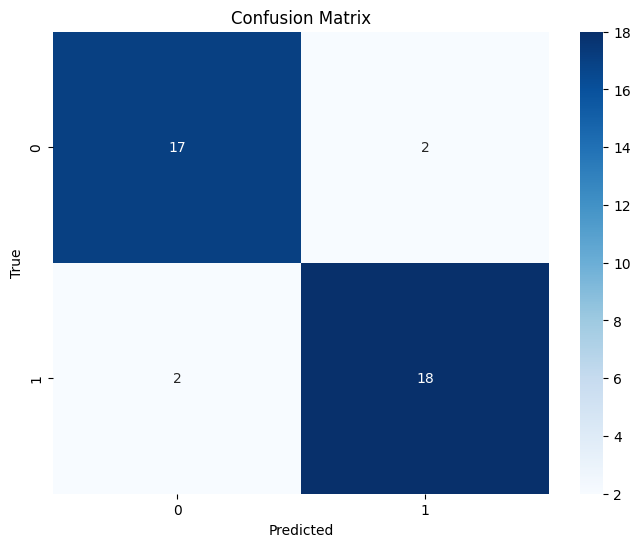

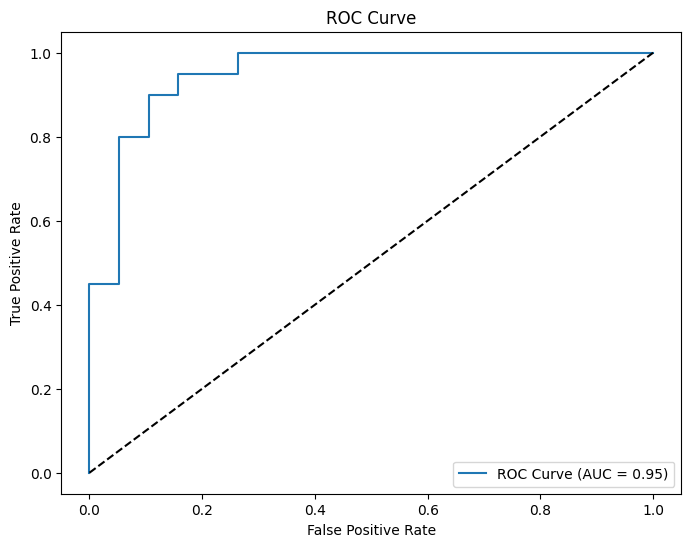

User 1: Predicted TYPE = 0, Class Probabilities = [0.85483    0.14516996]
User 2: Predicted TYPE = 1, Class Probabilities = [0.053716 0.946284]
User 3: Predicted TYPE = 0, Class Probabilities = [0.88543814 0.11456186]
User 4: Predicted TYPE = 1, Class Probabilities = [0.05479324 0.94520676]
User 5: Predicted TYPE = 1, Class Probabilities = [0.05568391 0.9443161 ]
User 6: Predicted TYPE = 1, Class Probabilities = [0.05201405 0.94798595]


In [128]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


ga_features = ['CA125','CA199', 'RBC', 'Na', 'MONO1', 'K', 'HCT']
X = data[ga_features]
y = data['TYPE']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Hyperparameter space for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(100, 1000, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 2, 3]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# ---- Predict on User Input ----
# Example user inputs with the correct feature order
user_data = pd.DataFrame([
    [40, 5.1, 42.5, 139, 9.1, 4.0, 37.0],  # Example input
    [12, 4.5, 41.2, 138, 8.9, 3.8, 39.0],  # Example input
    [50, 5.6, 44.0, 142, 9.2, 5.5, 40.0],  # Example input
    [5, 4.0, 36.0, 136, 6.5, 3.9, 38.0],   # Example input
    [10, 3.9, 38.2, 137, 7.0, 4.5, 39.5],  # Example input
    [6, 3.8, 39.1, 135, 6.8, 4.2, 37.5]    # Example input
], columns=ga_features)

# Standardize user data
user_data_scaled = scaler.transform(user_data)

# Predict on user input
user_predictions = best_model.predict(user_data_scaled)
user_probabilities = best_model.predict_proba(user_data_scaled)

# Display predictions and probabilities for each user
for i, (pred, prob) in enumerate(zip(user_predictions, user_probabilities), start=1):
    print(f'User {i}: Predicted TYPE = {pred}, Class Probabilities = {prob}')


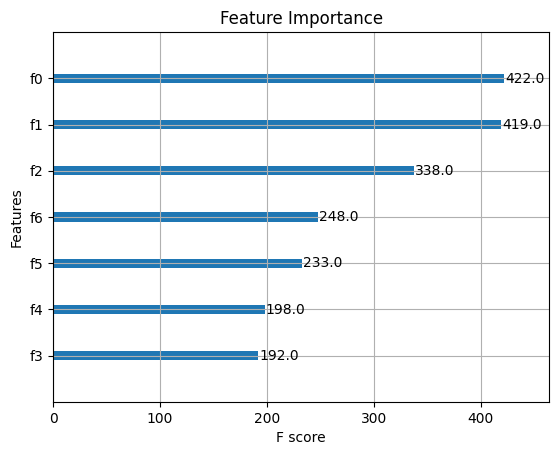

In [121]:
import xgboost as xgb

# Plotting feature importance
xgb.plot_importance(best_model)
plt.title('Feature Importance')
plt.show()


In [ ]:
['CA125','CA19-9', 'RBC', 'Na', 'MONO%', 'K', 'HCT']

Accuracy: 0.9706
ROC-AUC Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.93      0.97        15

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



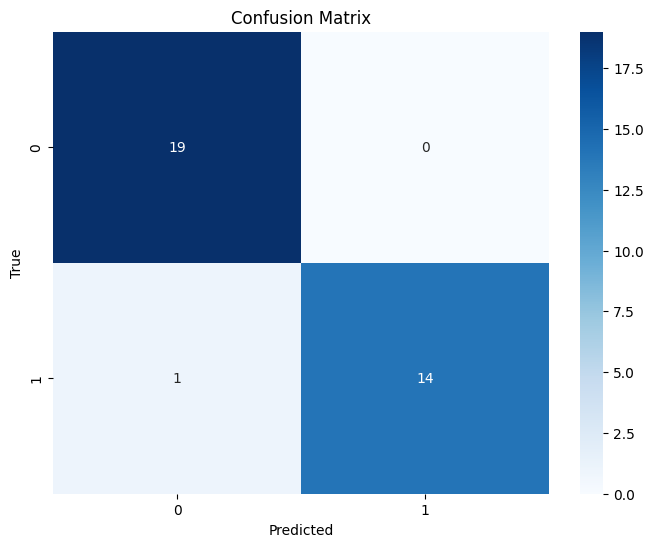

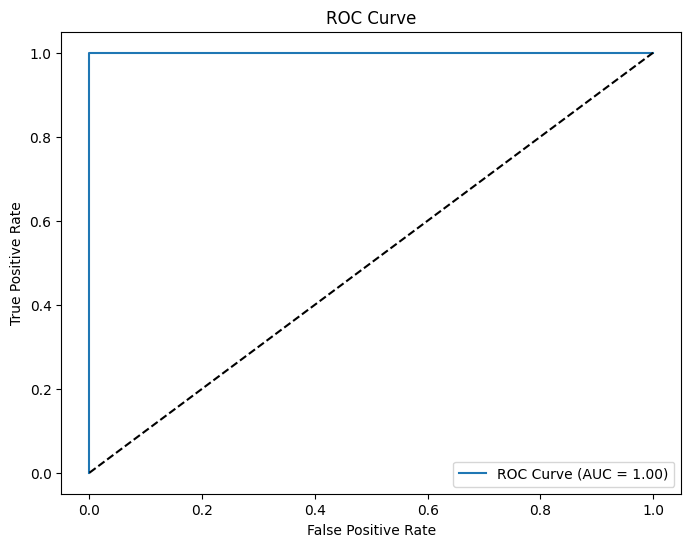

<Figure size 1000x800 with 0 Axes>

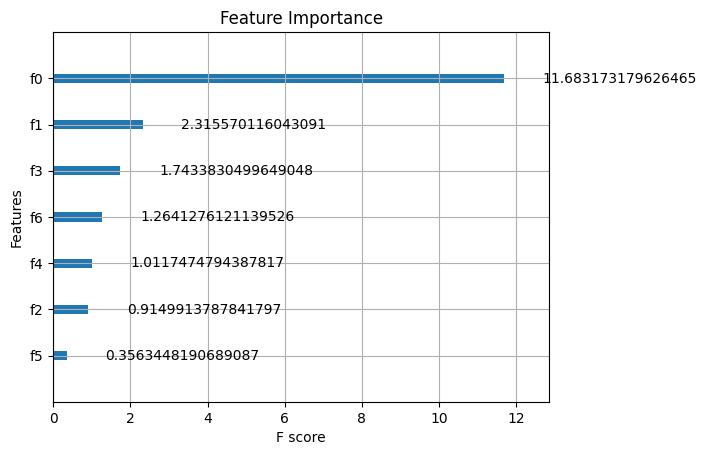

User 1: Predicted TYPE = 0, Class Probabilities = [0.85328656 0.14671342]
User 2: Predicted TYPE = 1, Class Probabilities = [0.05608505 0.94391495]
User 3: Predicted TYPE = 0, Class Probabilities = [0.8845885  0.11541153]
User 4: Predicted TYPE = 1, Class Probabilities = [0.05941463 0.9405854 ]
User 5: Predicted TYPE = 1, Class Probabilities = [0.05429953 0.94570047]
User 6: Predicted TYPE = 1, Class Probabilities = [0.0554803 0.9445197]


In [131]:
# Import necessary libraries
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier, plot_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE-ENN (oversampling + undersampling) for balanced dataset
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and configure the XGBoost classifier
xgb = XGBClassifier(
    eval_metric='logloss', random_state=42, n_estimators=200, learning_rate=0.1,
    max_depth=7, subsample=0.9, colsample_bytree=0.8, scale_pos_weight=1.5
)

# Train the model
xgb.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test_scaled)
y_prob = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb, importance_type='gain', max_num_features=10)
plt.title('Feature Importance')
plt.show()

# ---- Predict on User Input ----
# Example user inputs with the correct feature order
user_data = pd.DataFrame([
    [40, 5.1, 42.5, 139, 9.1, 4.0, 37.0],  # Example input
    [12, 4.5, 41.2, 138, 8.9, 3.8, 39.0],  # Example input
    [50, 5.6, 44.0, 142, 9.2, 5.5, 40.0],  # Example input
    [5, 4.0, 36.0, 136, 6.5, 3.9, 38.0],   # Example input
    [10, 3.9, 38.2, 137, 7.0, 4.5, 39.5],  # Example input
    [6, 3.8, 39.1, 135, 6.8, 4.2, 37.5]    # Example input
], columns=ga_features)

# Standardize user data
user_data_scaled = scaler.transform(user_data)

# Predict on user input
user_predictions = best_model.predict(user_data_scaled)
user_probabilities = best_model.predict_proba(user_data_scaled)

# Display predictions and probabilities for each user
for i, (pred, prob) in enumerate(zip(user_predictions, user_probabilities), start=1):
    print(f'User {i}: Predicted TYPE = {pred}, Class Probabilities = {prob}')



In [132]:
# ---- Save the model and scaler as pickle files ----
with open('xgb_model_post.pkl', 'wb') as model_file:
    pickle.dump(xgb, model_file)

with open('scaler_post.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [136]:
import pandas as pd
import pickle

# Load the scaler and model from the pickle files
with open('scaler_post.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('xgb_model_post.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

# Define the feature names
features = ['CA125','CA199', 'RBC', 'Na', 'MONO1', 'K', 'HCT']

# Function to get user input
def get_user_input():
    user_input = []
    for feature in features:
        value = float(input(f'Enter value for {feature}: '))
        user_input.append(value)
    return pd.DataFrame([user_input], columns=features)

# Get user data
user_data = get_user_input()

# Standardize the user data
user_data_scaled = scaler.transform(user_data)

# Predict on user input
user_prediction = xgb_model.predict(user_data_scaled)
user_probabilities = xgb_model.predict_proba(user_data_scaled)

# Display predictions and probabilities
print(f'Predicted TYPE = {user_prediction[0]}')
print(f'Class Probabilities = {user_probabilities[0]}')


Enter value for CA125: 16.65
Enter value for CA199: 58.78746
Enter value for RBC: 3.95
Enter value for Na: 41.6
Enter value for MONO1: 7.40
Enter value for K: 4.33
Enter value for HCT: 0.377
Predicted TYPE = 0
Class Probabilities = [0.69801176 0.30198824]


In [ ]:


user_data = pd.DataFrame([
    [45, 6.2, 5.0, 140, 7.2, 4.5, 37.5],  # Example input (possibly positive)
    [30, 4.8, 4.9, 138, 8.0, 4.0, 36.5],  # Example input (possibly negative)
    [50, 7.0, 5.2, 142, 6.5, 4.7, 39.0],  # Example input (possibly positive)
    [15, 5.1, 4.5, 135, 9.0, 3.9, 35.0],  # Example input (possibly negative)
    [60, 8.0, 5.1, 145, 7.8, 5.2, 38.0],  # Example input (possibly positive)
    [10, 3.5, 4.6, 130, 10.5, 3.8, 34.0]   # Example input (possibly negative)
], columns=['CA125', 'CA199', 'RBC', 'Na', 'MONO1', 'K', 'HCT'])